In [1]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
data = np.genfromtxt('data.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [4]:
mean_X = np.mean(X_train, axis=0)
std_X = np.std(X_train, axis=0)
X_train = (X_train - mean_X) / std_X
X_test = (X_test - mean_X) / std_X

In [5]:
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

In [6]:
theta = np.zeros(X_train.shape[1])
alpha = 0.01
iterations = 1000

In [7]:
# Function to compute the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [8]:
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = -(1/m) * np.sum(y * np.log(h) + (1-y) * np.log(1-h))
    return cost
# Function to perform gradient descent
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = (1/m) * np.dot(X.T, (h - y))
        theta -= alpha * gradient
        cost_history[i] = cost_function(X, y, theta)

    return theta, cost_history

In [9]:
# Run gradient descent
theta, cost_history = gradient_descent(X_train, y_train, theta, alpha, iterations)

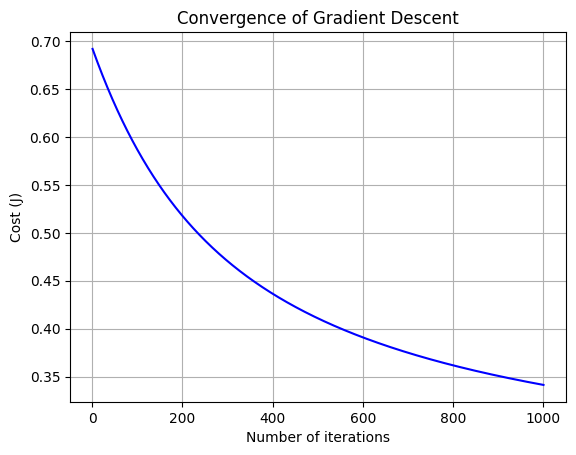

In [10]:
# Plot the cost history
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent')
plt.show()

In [11]:

# Function to predict the class labels
def predict(X, theta):
    return sigmoid(np.dot(X, theta))

In [12]:
# Make predictions on the test set
y_pred = predict(X_test, theta)

In [13]:
y_pred_binary = (y_pred >= 0.5).astype(int)

In [14]:
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy on the test set: {accuracy:.2f}")

Accuracy on the test set: 0.97


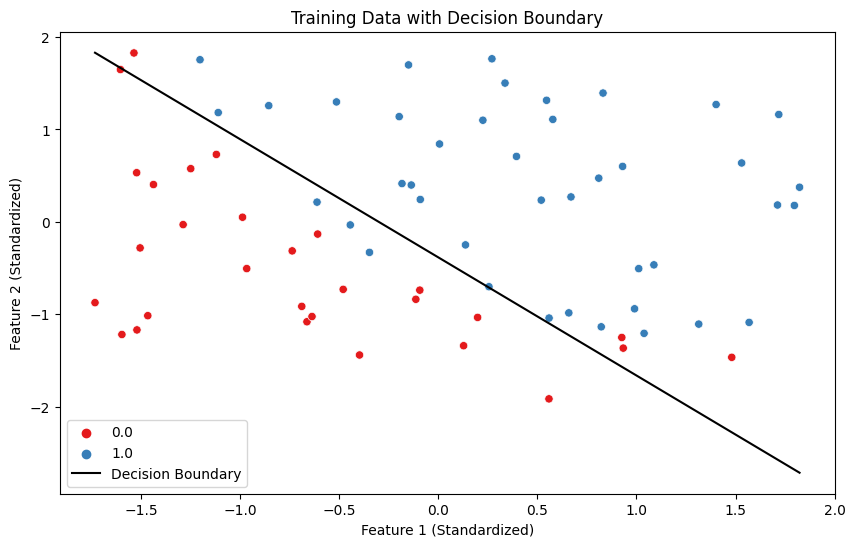

In [15]:
sns.scatterplot(x=X_train[:, 1], y=X_train[:, 2], hue=y_train, palette="Set1", marker="o")

# Decision boundary
x_min, x_max = X_train[:, 1].min(), X_train[:, 1].max()
boundary_x = np.array([x_min, x_max])
boundary_y = (-1/theta[2]) * (theta[1] * boundary_x + theta[0])

# Plot decision boundary
plt.plot(boundary_x, boundary_y, color='black', label='Decision Boundary')

plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.title('Training Data with Decision Boundary')

# Show legend
plt.legend()

plt.show()